# Import the Dataset & Exploratory Data Analysis

Data Types and Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB
None

Missing Values: 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Mean:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

Median:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

Mode:


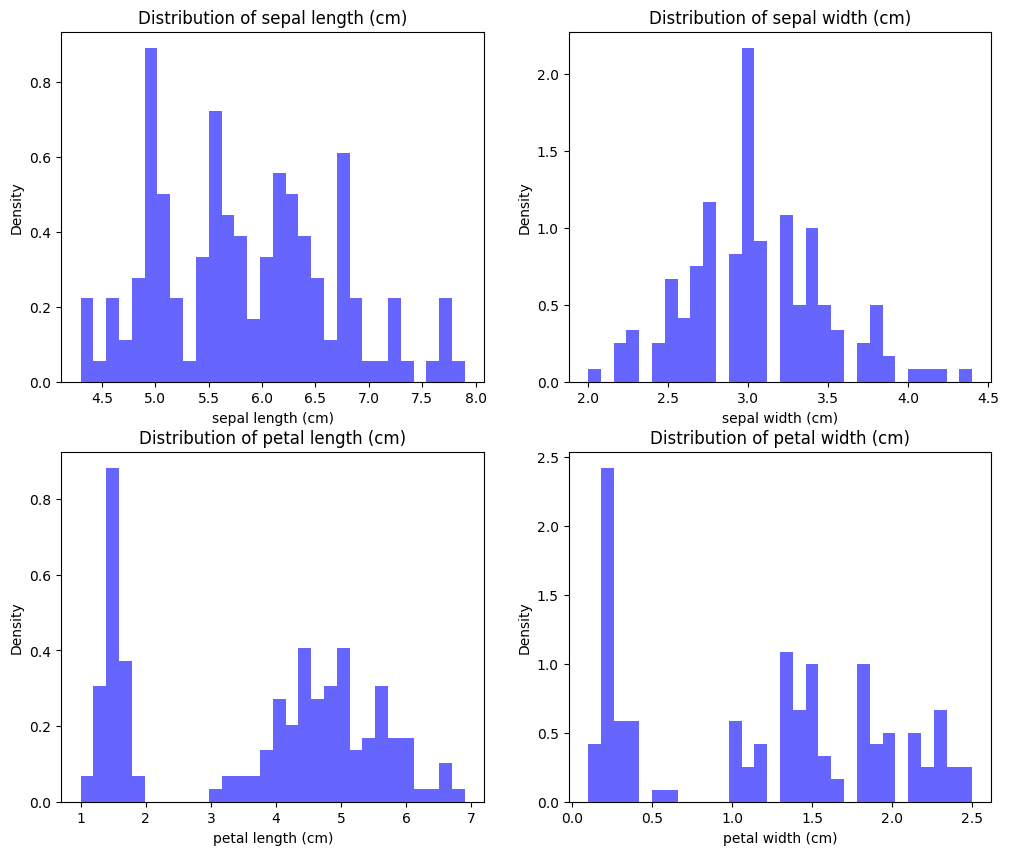

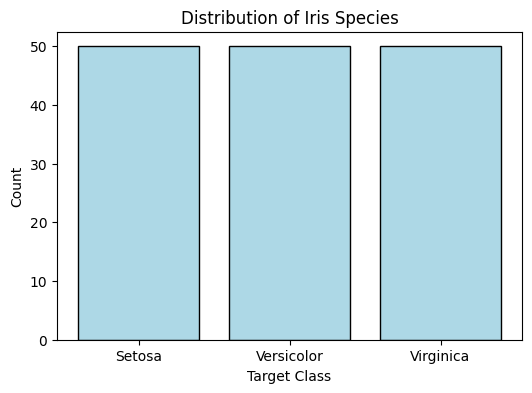

Feature Relationships 



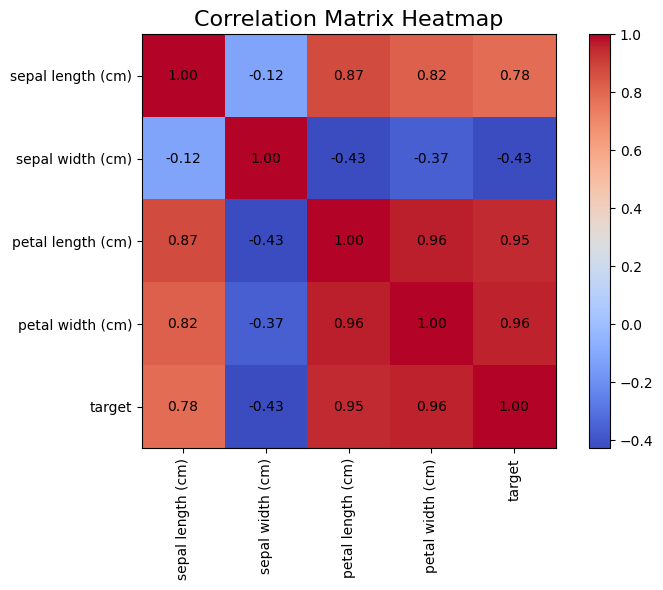

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
data = load_iris()
# X represents the features of the iris dataset
X = data.data
# y represents the target of the iris dataset 
y = data.target  

# make df a dataframe of the iris dataset so that we can do exploratory data analysis
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Displays the Dataset Types and Structure of the Iris dataset
print("Data Types and Structure:")
print(df.info())

# Displays any missing values in the Iris Dataset
print("\nMissing Values: ")
print(df.isnull().sum())

# Mean of each column in Iris dataset
print("\nMean:")
print(df.mean())

# Median of each column in the Iris dataset
print("\nMedian:")
print(df.median())

# Mode of each column in the Iris dataset
print("\nMode:")
print(df.mode().iloc[0])

# Standard Deviation of each column in the Iris dataset
print("\nStandard Deviation:")
print(df.std())

# Prints the 25, 50, 75 percent quartiles of each column in the Iris Dataset
print("\nQuartiles:")
print(df.quantile([0.25, 0.5, 0.75]).transpose())

# Displays histograms of each column in the Iris dataset to show the data distribution
cols = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
#create the plotss for the column distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

#fill in the plots with the feature data
for i, columns in enumerate(cols):
    #col_data has the data for each figure
    col_data = df[columns]
    #fills the feature graphs with the feature data
    axes[i].hist(col_data, bins=30, density=True, color='blue', alpha=0.6, label='Histogram')
    # Set plot title and labels
    axes[i].set_title(f"Distribution of {columns}")
    axes[i].set_xlabel(columns)
    axes[i].set_ylabel("Density")

#plot for target column
target_counts = df['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color='lightblue', edgecolor='black')

# Set plot title and labels
plt.title("Distribution of Iris Species")
plt.xlabel("Target Class")
plt.ylabel("Count")
#replace the target values with what Iris type they represent
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

#Feature relationships
#Display a correlation matrix to show the relationships between features
#the correlation matrix for the iris dataset
corr_matrix = df.corr()
print("Feature Relationships \n")
# Create a figure for the iris correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
# Plot the heatmap
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

# Set axis labels on the heatmap
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.index)

#displays the correlation matrix values on the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center')

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


# Import the Dataset and Preprocess the Data

In [2]:
from sklearn.preprocessing import StandardScaler
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply Standard Scaler to scale the features as it is less sensitive to outliers
scaler = StandardScaler()
# Fit on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learn and Compare the Models

In [4]:
#Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#the hyperparameters tested for each training model
params = {
    "Random Forest": {
        "n_estimators": [10, 15, 30, 45],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10, 20]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 8, 10, 15],
        "min_samples_leaf": [2, 5, 10, 20]
    },
    "Naive Bayes": {}, 
    "KNN": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "leaf_size": [10, 20, 30, 40]
    }
}

# Grid Search
#set of the best parameters for each model
bestModels = {}

# finds the best set of hyper-parameters for each learner and adds it to bestModels
#Random Forest
random_forest_grid = GridSearchCV(RandomForestClassifier(), params["Random Forest"], cv=3, scoring="f1_weighted")
random_forest_grid.fit(X_train_scaled, y_train)
bestModels["Random Forest"] = random_forest_grid.best_estimator_
print(f"Best Parameters for Random Forest: {random_forest_grid.best_params_}")

# Decision Tree
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), params["Decision Tree"], cv=3, scoring="f1_weighted")
decision_tree_grid.fit(X_train_scaled, y_train)
bestModels["Decision Tree"] = decision_tree_grid.best_estimator_
print(f"Best Parameters for Decision Tree: {decision_tree_grid.best_params_}")

# Naive Bayes
naive_bayes_grid = GridSearchCV(GaussianNB(), params["Naive Bayes"], cv=3, scoring="f1_weighted")
naive_bayes_grid.fit(X_train_scaled, y_train)
bestModels["Naive Bayes"] = naive_bayes_grid.best_estimator_
print(f"Best Parameters for Naive Bayes: {naive_bayes_grid.best_params_}")

# KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), params["KNN"], cv=3, scoring="f1_weighted")
knn_grid.fit(X_train_scaled, y_train)
bestModels["KNN"] = knn_grid.best_estimator_
print(f"Best Parameters for KNN: {knn_grid.best_params_}")

#holds the performance of each model
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

#loops through each of the models in bestModels and predicts the accuracy, precision, recall, f1-score, and ROC-AUC if applicable for each model
for modelName, model in bestModels.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled)
        roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class="ovr", average="weighted")
    else:
        roc_auc = None
    #append the vlaues to result
    results = pd.concat([results, pd.DataFrame([{
        "Model": modelName,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }])], ignore_index=True)
#print results
print("\nModel Comparison:")
print(results)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 15}
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 5}
Best Parameters for Naive Bayes: {}
Best Parameters for KNN: {'leaf_size': 10, 'n_neighbors': 9}

Model Comparison:
           Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Random Forest       1.0        1.0     1.0       1.0      1.0
1  Decision Tree       1.0        1.0     1.0       1.0      1.0
2    Naive Bayes       1.0        1.0     1.0       1.0      1.0
3            KNN       1.0        1.0     1.0       1.0      1.0
